# TASK 5

**IMPORTING LIBRARIES:**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

**IMPORTING THE DATASET:**

In [2]:
#loading the employeee dataset to pandas Dataframe
dataset = pd.read_csv('historicalquotes.csv',index_col='Date', parse_dates=True)

In [3]:
#To visualize first five rows of dataset
dataset.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
#To visualize bottom five rows in dataset
dataset.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-05,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2010-03-04,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2010-03-03,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2010-03-02,$29.8357,141486282,$29.99,$30.1186,$29.6771
2010-03-01,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [5]:
#total number of rows and columns in dataset
#there are 2518 rows and 6 columns
dataset.shape

(2518, 5)

In [6]:
#getting the stastics of dataset
dataset.describe

<bound method NDFrame.describe of             Close/Last     Volume       Open       High        Low
Date                                                              
2020-02-28     $273.36  106721200    $257.26    $278.41    $256.37
2020-02-27     $273.52   80151380     $281.1       $286    $272.96
2020-02-26     $292.65   49678430    $286.53    $297.88     $286.5
2020-02-25     $288.08   57668360    $300.95    $302.53    $286.13
2020-02-24     $298.18   55548830    $297.26    $304.18    $289.23
...                ...        ...        ...        ...        ...
2010-03-05    $31.2786  224647427   $30.7057   $31.3857   $30.6614
2010-03-04    $30.1014   89591907   $29.8971   $30.1314   $29.8043
2010-03-03    $29.9043   92846488   $29.8486   $29.9814   $29.7057
2010-03-02    $29.8357  141486282     $29.99   $30.1186   $29.6771
2010-03-01    $29.8557  137312041   $29.3928   $29.9286     $29.35

[2518 rows x 5 columns]>

In [7]:
#get whole information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2020-02-28 to 2010-03-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [8]:
#let's see what data types how many features we are having
dataset.dtypes.value_counts()

object    4
int64     1
dtype: int64

In [10]:
#featuers
dataset.dtypes.value_counts()

object    4
int64     1
dtype: int64

In [11]:
#total missing vaues in dataset
dataset.isnull().values.any()

False

In [12]:
# displaying number of records in dataset
len(dataset)

2518

In [13]:
# checking for null values in dataset
dataset.isna().any()

 Close/Last    False
 Volume        False
 Open          False
 High          False
 Low           False
dtype: bool

**STOCK PRICE DATA:**

In [14]:
dataset = dataset.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
dataset['Close'] = dataset['Close'].str.replace('$', '').astype('float')
dataset['Open'] = dataset['Open'].str.replace('$', '').astype('float')
dataset['High'] = dataset['High'].str.replace('$', '').astype('float')
dataset['Low'] = dataset['Low'].str.replace('$', '').astype('float')
dataset.head()

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


In [15]:
dataset.dtypes

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

**CORRELATION:**

In [16]:
#getting correlation
dataset.corr()

,Close,Volume,Open,High,Low
Close,1.000000,-0.608502,0.999653,0.999828,0.999842
Volume,-0.608502,1.000000,-0.607704,-0.605073,-0.611775
Open,0.999653,-0.607704,1.000000,0.999842,0.999810
High,0.999828,-0.605073,0.999842,1.000000,0.999756
Low,0.999842,-0.611775,0.999810,0.999756,1.000000


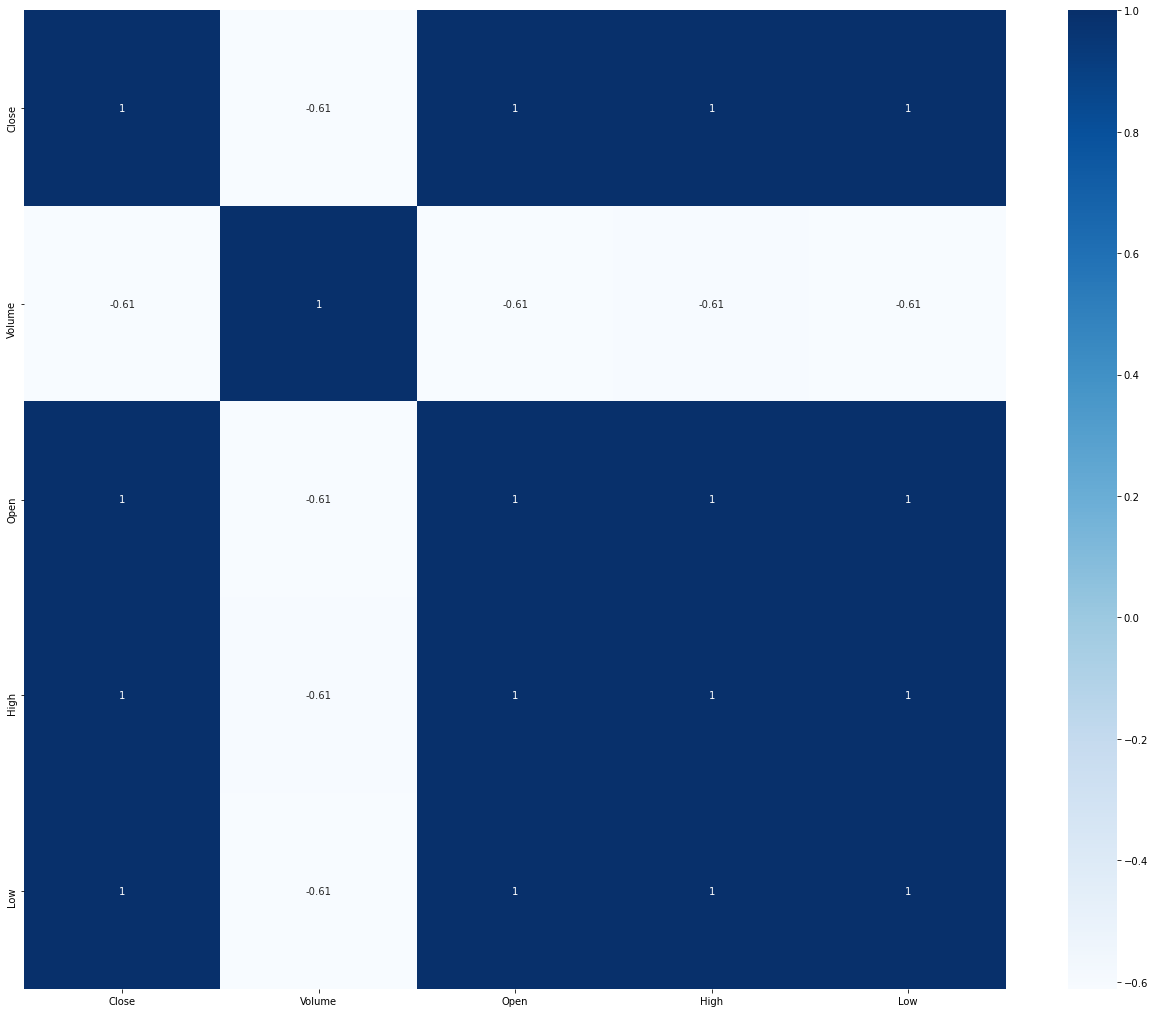

In [17]:
corrmat = dataset.corr()
top_corr = corrmat.index
plt.figure(figsize =(22,18))
p = sns.heatmap(dataset[top_corr].corr(),annot = True,cmap ="Blues")
plt.show()

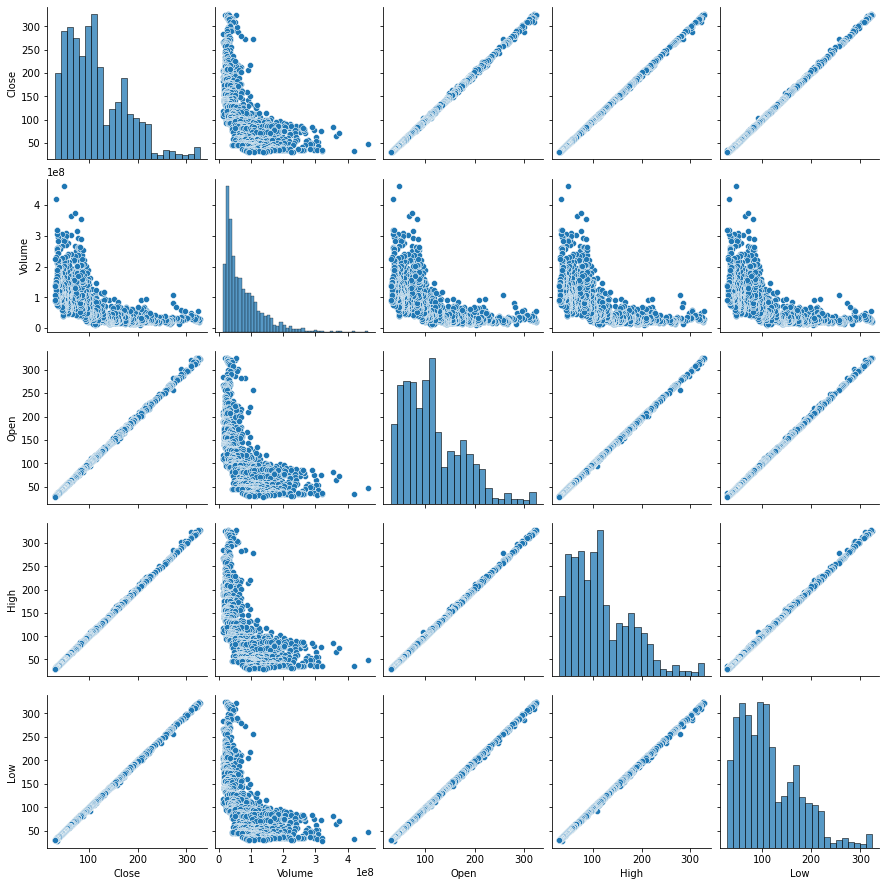

In [18]:
sns.pairplot(dataset)

In [19]:
dataset.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

**VISUALIZATION OF DATA:**

Text(0, 0.5, 'Close Price ($)')

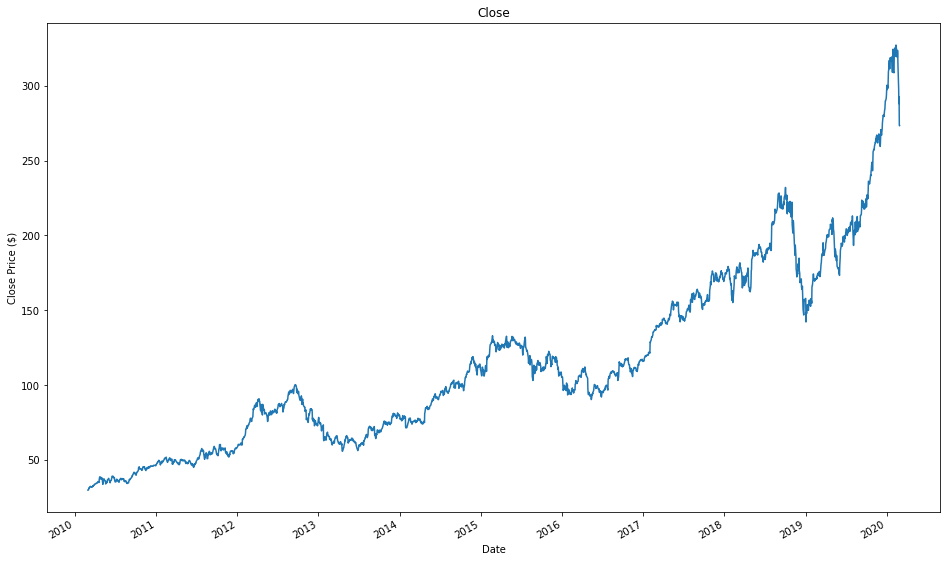

In [20]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
dataset['Close'].plot()

# setting plot title, x and y labels
plt.title("Close")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [21]:
# calculating 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN,NaN,NaN
2020-02-21,NaN,NaN,NaN,NaN,NaN
2020-02-20,294.162857,5.819087e+07,294.907143,302.014286,288.557143
2020-02-19,301.342857,4.630156e+07,303.870000,308.608571,297.647143
2020-02-18,307.840000,4.030715e+07,308.764286,313.430000,303.597143


<AxesSubplot:xlabel='Date'>

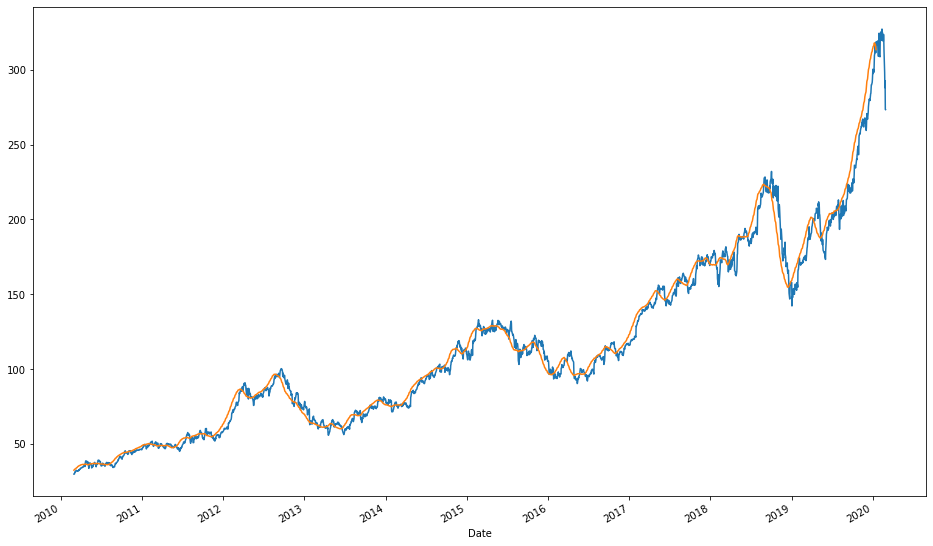

In [22]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
dataset['Close'].plot()
dataset.rolling(window=30).mean()['Close'].plot()

In [23]:
# displaying dataset
dataset

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700
2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057


<AxesSubplot:xlabel='Date'>

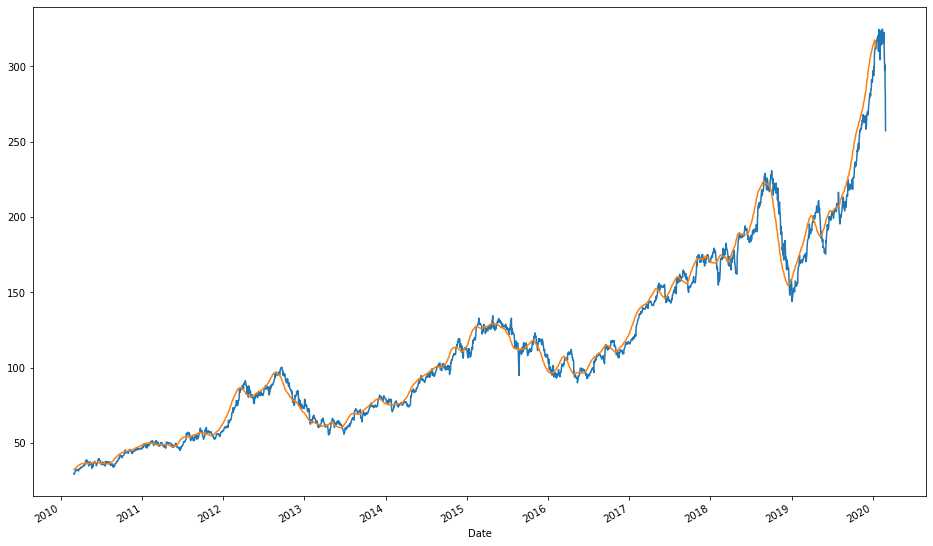

In [24]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
dataset['Open'].plot()
dataset.rolling(window=30).mean()['Open'].plot()

In [25]:
# displaying dataset
dataset

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700
2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057


**DATA SPLITTING:**

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [27]:
print(dataset)

[[5.29570283e-07]
 [2.30777270e-01]
 [4.94755129e-07]
 ...
 [2.00781805e-09]
 [3.16644909e-09]
 [1.91526597e-09]]


In [28]:
#splitting dataset into train and test split
training_size=int(len(dataset)*0.65)
test_size=len(dataset)-training_size
train_data,test_data=dataset[0:training_size,:],dataset[training_size:len(dataset),:1]

In [29]:
training_size,test_size

(8183, 4407)

In [30]:
train_data

array([[5.29570283e-07],
       [2.30777270e-01],
       [4.94755129e-07],
       ...,
       [9.00949155e-08],
       [1.65959590e-01],
       [8.85825106e-08]])

In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(8082, 100)
(8082,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(4306, 100)
(4306,)


(None, None)

**LONG SHORT TERM MEMOREY(LSTM):**

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
127/127 [==============================] - 54s 331ms/step - loss: 0.0020 - val_loss: 0.0155
Epoch 2/10
127/127 [==============================] - 39s 311ms/step - loss: 0.0019 - val_loss: 0.0139
Epoch 3/10
127/127 [==============================] - 40s 314ms/step - loss: 0.0013 - val_loss: 0.0084
Epoch 4/10
127/127 [==============================] - 39s 310ms/step - loss: 0.0011 - val_loss: 0.0077
Epoch 5/10
127/127 [==============================] - 39s 309ms/step - loss: 0.0010 - val_loss: 0.0082
Epoch 6/10
127/127 [==============================] - 128s 1s/step - loss: 9.8138e-04 - val_loss: 0.0073
Epoch 7/10
127/127 [==============================] - 34s 268ms/step - loss: 9.4357e-04 - val_loss: 0.0061
Epoch 8/10
127/127 [==============================] - 28s 224ms/step - loss: 8.9177e-04 - val_loss: 0.0052
Epoch 9/10
127/127 [==============================] - 29s 226ms/step - loss: 7.0966e-04 - val_loss: 0.0044
Epoch 10/10
127/127 [==============================] - 28s 

In [40]:
import tensorflow as tf

In [41]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [42]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21546342.737503223

In [44]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

53177541.71681321

In [50]:
len(test_data)

4407

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 4066)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[7.382218270355774e-08,
 7.426721119632664e-08,
 0.2463394793333913,
 7.38005583841812e-08,
 7.606505710929115e-08,
 7.258051428495753e-08,
 7.527728315440426e-08,
 0.24333750482026426,
 7.187296655495756e-08,
 7.616388024884186e-08,
 7.131376165588055e-08,
 7.229009967573077e-08,
 0.23130719964801819,
 7.407864713136334e-08,
 7.439998451729852e-08,
 7.159487780777542e-08,
 7.269728560959079e-08,
 0.32595994432404485,
 6.91945783569809e-08,
 7.370800629724967e-08,
 6.785387055563618e-08,
 7.092776755500955e-08,
 0.40041520276410175,
 7.41125973127845e-08,
 7.468110066919339e-08,
 6.892276066241794e-08,
 7.556467035891828e-08,
 0.2413649971172636,
 7.865067697714251e-08,
 7.90678100979157e-08,
 7.503638823654973e-08,
 7.892552207641818e-08,
 0.1712996312057413,
 7.792777598038521e-08,
 7.990186009626837e-08,
 7.792474857567247e-08,
 7.837885928257956e-08,
 0.1808123444564626,
 7.99234844156449e-08,
 8.046084875215159e-08,
 7.760968224235647e-08,
 7.955262733833745e-08,
 0.21505003201588